In [1]:
from sklearn.base import BaseEstimator
from sklearn.utils import check_X_y
from sklearn.cluster import KMeans

# The KMC classifier uses a clustering algorithm to define K groups of examples of each class in the training base.
class KMeansCentroidsClassifier(BaseEstimator):
    def __init__(self, k=1, nClasses=None):
        super().__init__()
        self.k = k
        self.nClasses = nClasses
        self.groups = self.k * self.nClasses
        self.centroids = []

    # Assuming that a database has nClasses classes, the KMC algorithm initially forms K*nClasses groups, with K groups in each of the nClasses classes. The centroids of each of the groups are calculated and this centroid is associated with the class of the group from which it was generated. The method has the value of K as a hyperparameter.
    def fit(self, x_train, y_train):
            # x_train, y_train = check_X_y(x_train, y_train)

        # Initialize nClasses:
        self.nClasses = len(np.unique(y_train)
        )

        for _class in self.nClasses:
            # Initialize KMeans:
            km = KMeans(n_clusters=self.k, random_state=36851234)
            # Fit KMeans:
            km.fit(x_train[y_train == _class], y_train[y_train == _class])
            # Append centroids:
            self.centroids.append(km.cluster_centers_)

        # KMC calculates the centroids of each of the classes:
        # KMC associates each of the centroids with the class of the group from which it was generated:
        self.labels = np.array([np.argmin(np.linalg.norm(self.centroids - self.centroids[i], axis=1)) for i in range(self.groups)])
        self.centroids = self.kmeans.cluster_centers_
        self.labels = self.kmeans.labels_

    # To perform a classification, KMC checks which centroid is closest to the element to be classified and returns its class. To create the KMC method, sklearn's Kmeans method (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) must be used with default values for its hyperparameters.
    def predict(self, x_test):
        (n, _) = x_test.shape

        # KMC checks which centroid is closest to the element to be classified and returns its class:

        prd = [self.__self_pred]
        return np.array(prd)


In [4]:
# Importa pacotes necessários via kernel do Jupyter
# %pip install numpy seaborn scipy sklearn matplotlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_digits, load_iris, load_wine
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

# Load digits dataset from scikit-learn; split into data and target/label
digits_data, digits_labels = load_digits(return_X_y=True)
# Get the number of samples (lines) and features (columns); also get the number of unique labels, i.e. the number of classes
(n_samples, n_features), n_digits = digits_data.shape, np.unique(digits_labels).size
print(f"- digits: {n_digits}; - samples: {n_samples}; - features: {n_features}")

# Initialize a dummy classifier (zeroR), and the Naive Bayes classifier (GaussianNB)
zR = DummyClassifier(strategy='most_frequent')
gNB = GaussianNB()

# Initialize a scalar pipeline to scale the data before feeding it to the classifier
scalar = StandardScaler()

pipeline_gNB = Pipeline([('transformer', scalar), ('estimator', gNB)])
pipeline_zR = Pipeline([('transformer', scalar), ('estimator', zR)])

# Initialize a stratified k-fold cross-validation object with seed provided by the professor
RSKF = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

# Use zeroR (DummyClassifier) and naiveBayes to predict the class of the data with stratified cross-validation (10-fold), repeated 3 times
score_gNB = cross_val_score(pipeline_gNB, digits_data, digits_labels, scoring='accuracy', cv=RSKF)
score_zR = cross_val_score(pipeline_zR, digits_data, digits_labels, scoring='accuracy', cv=RSKF)

# Print the accuracy scores for the classifiers
# gNB
mean_gNB = score_gNB.mean()
std_gNB = score_gNB.std()
lower_gNB, upper_gNB = stats.norm.interval(0.95, loc=mean_gNB, scale=std_gNB/np.sqrt(len(score_gNB)))
     
print("gNB score:\n", score_gNB)
print("gNB: Mean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_gNB, std_gNB))
print("gNB: Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (lower_gNB, upper_gNB)) 
       
# zR                          
mean_zR = score_zR.mean()
std_zR = score_zR.std()
lower_zR, upper_zR = stats.norm.interval(0.95, loc=mean_zR, 
                               scale=std_zR/np.sqrt(len(score_zR)))

print("zR score:\n", score_zR)
print("zR: Mean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean_zR, std_zR))
print("zR: Accuracy Confidence Interval (95\%%): (%0.2f, %0.2f)\n" % (lower_zR, upper_zR)) 

# conf_mat = confusion_matrix(digits_labels, score_gNB)
# print(conf_mat)

# plt.matshow(conf_mat, cmap=plt.cm.Blues)
# for i in range(len(conf_mat)):
#     for j in range(len(conf_mat)):
#         plt.text(i, j, conf_mat[i][j], va="center", ha="center")

# plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
- digits: 10; - samples: 1797; - features: 64
gNB score:
 [0.77777778 0.80555556 0.80555556 0.75       0.72222222 0.76666667
 0.76666667 0.81564246 0.82122905 0.82681564 0.77777778 0.78333333
 0.78333333 0.77777778 0.74444444 0.76111111 0.75555556 0.77094972
 0.79888268 0.81005587 0.81111111 0.73888889 0.76111111 0.8
 0.83888889 0.77777778 0.77777778 0.8547486  0.75418994 0.79329609]
gNB: Mean Accuracy: 0.78 Standard Deviation: 0.03
gNB: Accuracy Confidence Interval (95%): (0.77, 0.80)

zR score:
 [0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.10055866 0.10614525 0.10614525 0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.10055866
 0.10614525 0.10614525 0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.10055866 0.10614525 0.10614525]
zR: Mean Accuracy: 0.10 Standard Devia

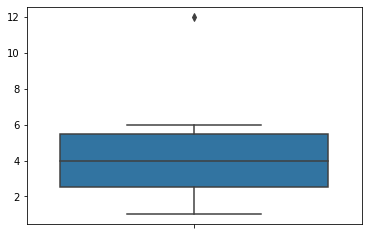

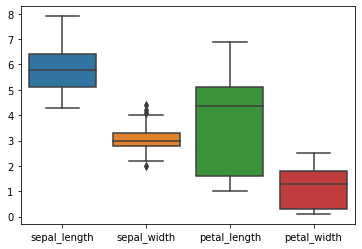

In [51]:

# ETAPA 2:
# A segunda etapa consiste no treino, validação e teste dos classificadores que precisam de ajuste de hiperparâmetros, isto é, os classificadores KMC, KNN e AD

dKNN = KNeighborsClassifier(weights='distance')
pipeline_kNN = Pipeline([('transformer', scalar), ('estimator', dKNN)])
KMC = KMCClassifier()
pipeline_kNN = Pipeline([('transformer', scalar), ('estimator', KMC)])
AD = DecisionTreeClassifier()
pipeline_AD = Pipeline([('transformer', scalar), ('estimator', AD)])


# Neste caso, o procedimento de treinamento, validação e teste será realizado através de 3 rodadas de ciclos aninhados de validação e teste,
# com o ciclo interno de validação contendo 4 folds e o externo de teste com 10 folds.
RSKF = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# A busca em grade (grid search) do ciclo interno deve considerar os seguintes valores de hiperparâmetros de cada técnica de aprendizado:
# KMC: [k = 1, 3, 5, 7]
# KNN: [n_neighbors = 1, 3, 5, 7]
# AD: [max_depth = None, 3, 5, 10]
# grade_KMC = {'estimator__k': [1, 3, 5, 7]}
grade_kNN = {'estimator__n_neighbors': [1, 3, 5, 7]}
grade_AD = {'estimator__max_depth': [None, 3, 5, 10]}
# grid_search_KMC = GridSearchCV(estimator=pipeline, param_grid=grade, scoring='accuracy', cv=4)
grid_search_kNN = GridSearchCV(estimator=pipeline_kNN, param_grid=grade_kNN, scoring='accuracy', cv=4)
grid_search_AD = GridSearchCV(estimator=pipeline_AD, param_grid=grade_AD, scoring='accuracy', cv=4)

# Os dados utilizados no conjunto de treino em cada rodada de teste devem ser padronizados (normalização com z-score).
# Os valores de padronização obtidos nos dados de treino devem ser utilizados para padronizar os dados do respectivo conjunto de teste.
# ?

scores_kNN = cross_val_score(grid_search_kNN, digits_data, digits_labels, scoring='accuracy', cv=RSKF)
scores_AD = cross_val_score(grid_search_AD, digits_data, digits_labels, scoring='accuracy', cv=RSKF)
# scores_KMC = cross_val_score(grid_search_KMC, digits_data, digits_labels, scoring='accuracy', cv=RSKF)

# Os resultados de cada classificador devem ser apresentados numa tabela contendo a média das acurácias obtidas em cada fold, o desvio padrão e o intervalo de confiança a 95% de significância dos resultados,

# e também através do boxplot dos resultados de cada classificador em cada fold.
# Os gráficos bloxplot requeridos no treino e no teste devem ser gerados usando função específica do pacote seaborn
def example1():
    mydata = [1, 2, 3, 4, 5, 6, 12]
    sns.boxplot(y=mydata)  # Also accepts numpy arrays
    plt.show()


def example2():
    df = sns.load_dataset('iris')
    # returns a DataFrame object. This dataset has 150 examples.
    # print(df)
    # Make boxplot for each group
    sns.boxplot(data=df.loc[:, :])
    # loc[:,:] means all lines and all columns
    plt.show()


# example1()
# example2()

# será necessário apresentar também a tabela pareada dos resultados (p-values) dos testes de hipótese entre os pares de métodos.
# Na matriz triangular superior devem ser apresentados os resultados do teste t pareado (amostras dependentes).
# Na matriz triangular inferior devem ser apresentados os resultado do teste não paramétrico de wilcoxon.
# Os valores da célula da tabela rejeitarem a hipótese nula para um nível de significância de 95% devem ser escritos em negrito.

